# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#lets try one to see the format
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key + "&q="
x = cities[2]
query_url = url + x
query_url
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(f"The first response for city {x} is {json.dumps(weather_json, indent=2)}.")

The first response for city rikitea is {
  "coord": {
    "lon": -134.9692,
    "lat": -23.1203
  },
  "weather": [
    {
      "id": 801,
      "main": "Clouds",
      "description": "few clouds",
      "icon": "02d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 26.13,
    "feels_like": 28.77,
    "temp_min": 26.13,
    "temp_max": 26.13,
    "pressure": 1015,
    "humidity": 69,
    "sea_level": 1015,
    "grnd_level": 1012
  },
  "visibility": 10000,
  "wind": {
    "speed": 1.5,
    "deg": 105
  },
  "clouds": {
    "all": 16
  },
  "dt": 1611849708,
  "sys": {
    "country": "PF",
    "sunrise": 1611844620,
    "sunset": 1611892117
  },
  "timezone": -32400,
  "id": 4030556,
  "name": "Rikitea",
  "cod": 200
}.


In [62]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key + "&q="
print("Beginning Data Retrieval")
#temps = []
lat = []
lng = []
mtemps = []
humid = []
cloud = []
wspeed = []
country = []
dates = []
ccount = 0
cset = 1
#for n in cities:
#    query_url = url + n
for n in range(50):
    query_url = url + cities[n]
    #print(f"{query_url}")
    ccount = ccount+1
    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #temps.append(weather_json)
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        mtemps.append(weather_json['main']['temp_max'])
        humid.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dates.append(weather_json['dt'])
        print(f"Processing Record {ccount} in set {cset} |  {cities[n]} n={n}")
    except:
        lat.append(0)
        lng.append(0)
        mtemps.append(0)
        humid.append(0)
        cloud.append(0)
        wspeed.append(0)
        country.append(0)
        dates.append(0)
        print(f"No data found for {cities[n]}")

Beginning Data Retrieval
Processing Record 1 in set 1 |  okakarara n=0
Processing Record 2 in set 1 |  spokane n=1
Processing Record 3 in set 1 |  punta arenas n=2
Processing Record 4 in set 1 |  ismailia n=3
Processing Record 5 in set 1 |  nehe n=4
No data found for illoqqortoormiut
Processing Record 7 in set 1 |  vaini n=6
Processing Record 8 in set 1 |  atuona n=7
Processing Record 9 in set 1 |  salalah n=8
Processing Record 10 in set 1 |  rikitea n=9
Processing Record 11 in set 1 |  qaanaaq n=10
Processing Record 12 in set 1 |  tire n=11
Processing Record 13 in set 1 |  huanuco n=12
Processing Record 14 in set 1 |  westport n=13
Processing Record 15 in set 1 |  airai n=14
Processing Record 16 in set 1 |  port alfred n=15
Processing Record 17 in set 1 |  havelock n=16
Processing Record 18 in set 1 |  albany n=17
Processing Record 19 in set 1 |  poum n=18
Processing Record 20 in set 1 |  cidreira n=19
Processing Record 21 in set 1 |  kaharlyk n=20
No data found for haibowan
Processin

In [78]:
#len(lat)
len(cities)


623

In [76]:
cset = cset+1
for n in range(23):
    query_url = url + cities[ccount]
    ccount = ccount+1
    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #temps.append(weather_json)
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        mtemps.append(weather_json['main']['temp_max'])
        humid.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dates.append(weather_json['dt'])
        print(f"Processing Record {ccount} in set {cset} |  {cities[ccount-1]}")
    except:
        lat.append(0)
        lng.append(0)
        mtemps.append(0)
        humid.append(0)
        cloud.append(0)
        wspeed.append(0)
        country.append(0)
        dates.append(0)
        print(f"No data found for {cities[ccount-1]}")

Processing Record 601 in set 13 |  clarence town
Processing Record 602 in set 13 |  dauphin
Processing Record 603 in set 13 |  kalmunai
Processing Record 604 in set 13 |  oyama
Processing Record 605 in set 13 |  valera
No data found for aybak
Processing Record 607 in set 13 |  vanavara
Processing Record 608 in set 13 |  boysun
Processing Record 609 in set 13 |  kamen-rybolov
Processing Record 610 in set 13 |  tura
No data found for mrirt
Processing Record 612 in set 13 |  tanglad
No data found for chom bung
Processing Record 614 in set 13 |  siukh
Processing Record 615 in set 13 |  great yarmouth
Processing Record 616 in set 13 |  rutul
Processing Record 617 in set 13 |  constitucion
Processing Record 618 in set 13 |  kochevo
Processing Record 619 in set 13 |  coquimbo
Processing Record 620 in set 13 |  henties bay
Processing Record 621 in set 13 |  olteni
Processing Record 622 in set 13 |  cuauhtemoc
Processing Record 623 in set 13 |  suntar


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": mtemps,
    "Humidity": humid,
    "Cloudiness": cloud,
    'Wind Speed': wspeed,
    "Country": country,
    "Date": dates
}
weather_data = pd.DataFrame(weather_dict)

#output city data to a file
weather_data.to_csv(output_data_file, encoding="utf-8", index=False, header=True)
# Output File (CSV)
#output_data_file = "output_data/cities.csv"

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okakarara,-20.5833,17.4333,70.00,58,77,2.44,NA,1611873976
1,spokane,47.6166,-117.3677,42.80,61,90,1.61,US,1611873972
2,punta arenas,-53.1500,-70.9167,46.40,66,75,17.27,CL,1611873977
3,ismailia,30.6043,32.2723,53.06,42,59,14.50,EG,1611873889
4,nehe,48.4833,124.8333,-19.28,85,0,2.51,CN,1611873977


In [81]:
weather_data.iloc[16,:]

City            havelock
Lat              34.8791
Lng             -76.9013
Max Temp            37.4
Humidity              60
Cloudiness            40
Wind Speed         24.16
Country               US
Date          1611873978
Name: 16, dtype: object

In [82]:
cleaned_weather_df = weather_data.loc[weather_data['Date'] != 0]
cleaned_weather_df['City'].count()

571

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [83]:
clean_city_data = cleaned_weather_df.loc[cleaned_weather_df['Humidity'] <= 100]
#clean_city_data['City'].count()
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okakarara,-20.5833,17.4333,70.00,58,77,2.44,NA,1611873976
1,spokane,47.6166,-117.3677,42.80,61,90,1.61,US,1611873972
2,punta arenas,-53.1500,-70.9167,46.40,66,75,17.27,CL,1611873977
3,ismailia,30.6043,32.2723,53.06,42,59,14.50,EG,1611873889
4,nehe,48.4833,124.8333,-19.28,85,0,2.51,CN,1611873977


In [84]:
#  Get the indices of cities that have humidity over 100%.
cleaned_weather_df.loc[cleaned_weather_df['Humidity'] > 100].index.values.tolist()


[]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

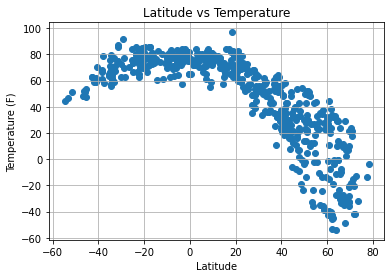

In [85]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperaturevsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

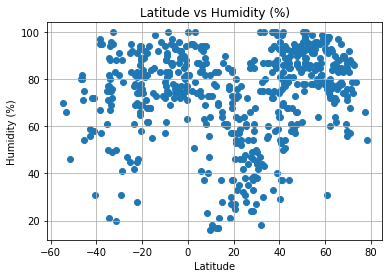

In [86]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

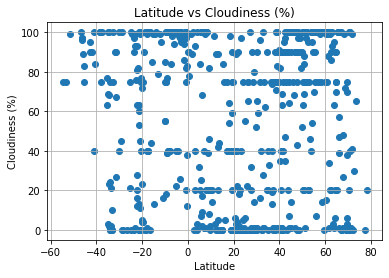

In [87]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

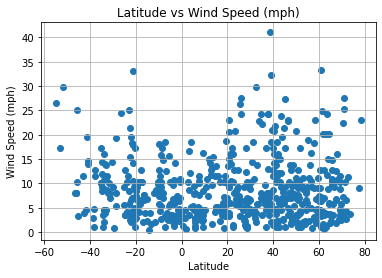

In [88]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindSpeedvsLatitude.png")

# Show plot
plt.show()

## Linear Regression

In [89]:

# Range of latitudes and longitudes
north_hemi = clean_city_data.loc[clean_city_data['Lat'] >= 0]
south_hemi = clean_city_data.loc[clean_city_data['Lat'] < 0]
#lat_range = (-90, 90)
#lng_range = (-180, 180)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

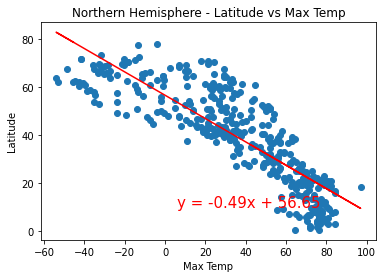

In [90]:
# Add the linear regression equation and line to plot
x_values = north_hemi["Max Temp"]
y_values = north_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Max Temp")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

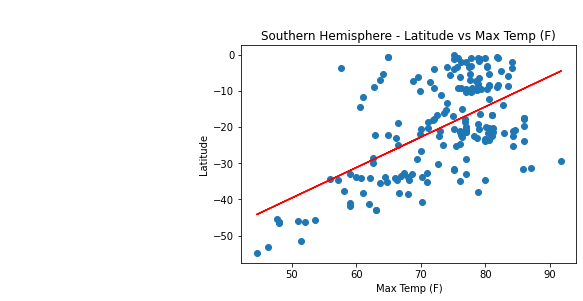

In [91]:
# Add the linear regression equation and line to plot
x_values = south_hemi["Max Temp"]
y_values = south_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Max Temp (F)")
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

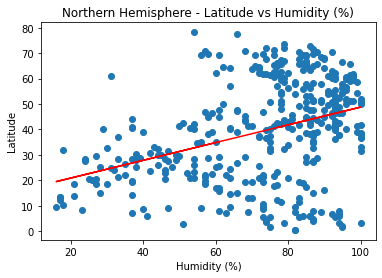

In [92]:
# Add the linear regression equation and line to plot
x_values = north_hemi["Humidity"]
y_values = north_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Humidity (%)")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

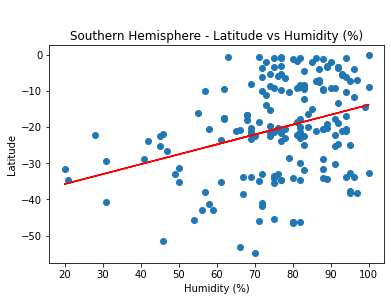

In [93]:
# Add the linear regression equation and line to plot
x_values = south_hemi["Humidity"]
y_values = south_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Humidity (%)")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

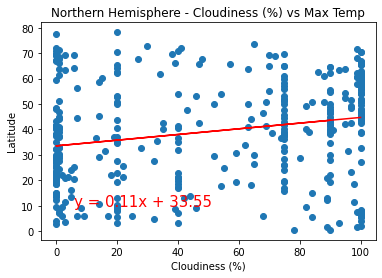

In [94]:
# Add the linear regression equation and line to plot
x_values = north_hemi["Cloudiness"]
y_values = north_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs Max Temp")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

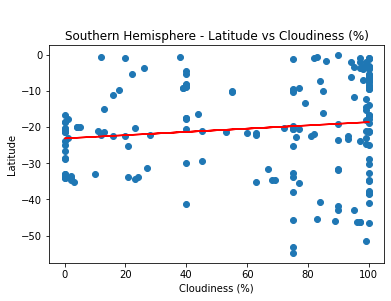

In [95]:
# Add the linear regression equation and line to plot
x_values = south_hemi["Cloudiness"]
y_values = south_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Cloudiness (%)")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

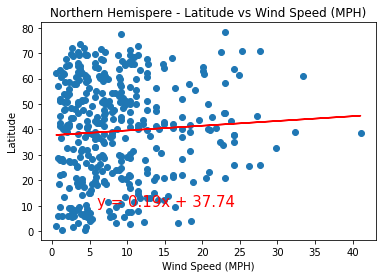

In [96]:
# Add the linear regression equation and line to plot
x_values = north_hemi["Wind Speed"]
y_values = north_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemispere - Latitude vs Wind Speed (MPH)")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

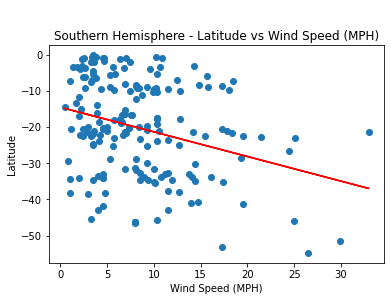

In [97]:
# Add the linear regression equation and line to plot
x_values = south_hemi["Wind Speed"]
y_values = south_hemi["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Wind Speed (MPH)")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.show()